======================================================================================================================
 
|**Inside Airbnb price prediction:**|
|-----------------------------------|




======================================================================================================================

In [1]:
!pip install gensim

You should consider upgrading via the 'c:\users\igwek\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
# data manipulating and ploting modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim

import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 14})


# Data CLeaning and Preliminary analysis

In [3]:
# import listings and display the first 5 rows
def get_view_data(file_name):
    """
    This function takes a file name as input,
    It returns a dataframe after displaying the first 5 rows.
    It encodes "NA", "?" and "na" as NaN (Just in case)
    :param file_name:
    :return: dataframe
    """
    df = pd.read_csv(file_name, na_values=['NA', '?', 'na'])
    print("\nThe first 5 rows are: \n")
    display(df.head())
    return df

### We Need a proper view of the data. The function below helps with visualizing the data

In [4]:
def show_info(df):
    """
    This function takes a dataframe as input,
    It displays : each column name, the number of unique values in each column,
    and the number of null values in each column.
    :param df:
    :return: None
    """
    import pandas as pdmax
    pdmax.set_option("display.max_row", None)
    
    unique_values = []
    null_values = []
    sample_values = []
    data_type = []
    df_len  = df.shape[0]
    df_col = df.shape[1]
    
    for col in df.columns:
        ind = np.random.randint(0, df_len)
        unique_values.append(len(df[col].unique()))
        null_values.append(df[col].isnull().sum())
        sample_values.append((df.loc[0,[col]])[0])
        data_type.append(df[col].dtypes)
    info_df = pd.DataFrame({"Unique_Values": unique_values, "Null_Values": null_values, 
                            "Data_Type":data_type, "Sample_Values":sample_values})
    
    info_df.index = df.columns
    
    print('\n{} rows, {} attributes'.format(df_len, df_col))
    print("\nFurther information : \n")
    info = info_df.sort_values(by = "Null_Values", ascending = False )
    display(info)
    return info

### We some helper functions

In [5]:
def drop_singular(info_df, df):
    """
    This function takes info_dataframe and the main dataframe as input,
    it drops rows (column in the main data) that has a singulare value.
    and return a customeized dataframe (Info_data frame) for vissualization
    :param df_info, df:
    :return: df_info, df
    """
    
    info_df = info_df[info_df["Unique_Values"] != 1]
    df = df[info_df.index]
    return df, info_df 
    
    

def clean_char(df, cols):
    """
    This function takes a dataframe as input,
    It removes the dollar sign from the column features.
    :param df:
    :return:
    """
    for col in cols:
        df[col] = df[col].apply(lambda x: str(x).replace('$', ''))
        df[col] = df[col].apply(lambda x: str(x).replace(',', ''))
        df[col] = df[col].apply(lambda x: float(str(x).replace('%', '')))
    return df


# clean text
def preprocess(text, reject_list):
    """
    This function takes a text  and list of words to reject as input,
    it removes the words in the reject list from the text and cleans the text,
    :param text: 
    :param reject_list: 
    :return: 
    """
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and token not in reject_list:
            result.append(token)    
    return result



def horizontal_nb(df, feature, target):
    """
    This function takes a dataframe, feature and target as input,
    it creates a horizontal bar plot of the feature and target,
    :param df: 
    :param feature: 
    :param target: 
    :return: 
    """
    # Initializing fig
    f, ax = plt.subplots(figsize=(10, 30))

    # for label and image name
    tittle = feature + " against "+ target
    
    # regroup and plot
    nb = pd.DataFrame(listings_df.groupby(feature).price.mean()).sort_values(by = target, ascending = False)
    sns.set_color_codes("pastel")
    sns.barplot(x = nb[target], y = nb.index, label= tittle, color="b")
    ax.legend(loc="lower right", frameon=True)
    ax.set(xlim=(0, nb.price.max()), ylabel= feature, xlabel = "mean Price")
    sns.despine(left=True, bottom=True)
    
    #save plot
    plt.savefig(tittle+".png", bbox_inches = "tight")
    return



# dealing with review score. Some helper function 
def select_startswith(df, key_word):
    """
    This function takes a dataframe as input,
    it selects columns that start with the word "review".
    :param df:
    :return:
    """
    require_columns = df.columns[df.columns.str.startswith(key_word)]
    require_columns_df = df[require_columns]
    require_columns_df["price"] = df["price"]
    return require_columns_df


# dealing with review score
def select_contains(df, key_word):
    """
    This function takes a dataframe as input,
    it selects columns that start with the word "review".
    :param df:
    :return:
    """
    require_columns = df.columns[df.columns.str.contains(key_word)]
    require_columns_df = df[require_columns]
    require_columns_df["price"] = df["price"]
    return require_columns_df


def plot_barplot(df, feature, target, size):
    """
    This function takes a dataframe as input,
    it plots the barplot of feature against target.
    :param df:
    :return:
    """
    tittle = "barplot " + feature + " against "+ target
    plt.figsize = size
    sns.barplot(x = df[feature], y = df[target])
    plt.savefig(tittle+".png", bbox_inches = "tight")
    plt.show()
    return


def plot_boxplot(df, feature, target, size):
    """
    This function takes a dataframe as input,
    it plots the boxplot of feature against target.
    :param df:
    :return:
    """
    tittle = "boxplot " + feature + " against "+ target
    plt.figsize = size
    sns.boxplot(y = df[feature], x = df[target])
    plt.savefig(tittle, bbox_inches = "tight")
    plt.show()
    return


def plot_scatterplot(df, feature, target, f_x, f_y):
    """
    This function takes a dataframe as input,
    it plots the barplot of feature against target.
    :param df:
    :return:
    """
    tittle = "scater plot " + feature + " against "+ target
    f, ax = plt.subplots(figsize = (f_x,f_y))
    sns.scatterplot(x = df[feature], y = df[target])
    plt.tick_params(axis='x', rotation = 45)
    plt.savefig(tittle +".png", bbox_inches = "tight")
    plt.show()
    return


#Correlation with price
def plot_heatmap(df, corr_about):
    """
    This function takes a dataframe as input,
    It plots the heatmap of pearson correlation between features and target.
    :param df:
    :return:
    """
    corr = df.corr()
    tittle_head = "Pearson Correlation of " + corr_about
    fig_tittl = tittle_head + ".png"
    plt.figure(figsize=(12, 10))
    plt.title(tittle_head)
    sns.heatmap(corr, annot=True)
    plt.savefig(tittle_head, bbox_inches = "tight")
    plt.show()
    return

## Actual cleaning and preprocessing

The table shows the number of unique values,  of nul values datatype of  each  column and a sample feature.

In [6]:
listings_df = get_view_data("listings.csv")
info_df = show_info(listings_df)


The first 5 rows are: 



,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,23726706,https://www.airbnb.com/rooms/23726706,20220605131734,2022-06-05,Private room 20 minutes from Amsterdam + Break...,Cousy private room 20 min. from Amsterdam. Sh...,We live in a nice Cousy and clean house with e...,https://a0.muscache.com/pictures/eb6d6636-02d6...,122619127,https://www.airbnb.com/users/show/122619127,...,4.97,4.73,4.87,038469D9AA6BDF1142CE,t,1,0,1,0,1.53
1,35815036,https://www.airbnb.com/rooms/35815036,20220605131734,2022-06-05,"Vrijstaand vakantiehuis, privé tuin aan het water",Bij het pittoreske dorpje Watergang ligt ons p...,U heeft hier diverse mogelijkheden. Zo kunt u ...,https://a0.muscache.com/pictures/e309d415-78de...,269425139,https://www.airbnb.com/users/show/269425139,...,4.98,4.81,4.83,NaN,f,1,1,0,0,2.65
2,31553121,https://www.airbnb.com/rooms/31553121,20220605131734,2022-06-05,Quiet Guesthouse near Amsterdam,Welcome to the countryside north of Amsterdam ...,Within 6 kilometers of the city center you'll ...,https://a0.muscache.com/pictures/64edc273-3b2b...,76806621,https://www.airbnb.com/users/show/76806621,...,4.95,4.62,4.59,NaN,f,1,1,0,0,2.02
3,34745823,https://www.airbnb.com/rooms/34745823,20220605131734,2022-06-05,"Apartment ' Landzicht', nearby Amsterdam","Apartment 'Landzicht', one of our three apartm...",Beautiful apartment 'Landzicht’ located at a b...,https://a0.muscache.com/pictures/ceaafefc-7ccd...,238083700,https://www.airbnb.com/users/show/238083700,...,4.97,4.87,4.90,NaN,f,3,3,0,0,1.08
4,44586947,https://www.airbnb.com/rooms/44586947,20220605131734,2022-06-05,"Weesp, 2 kamers vlakbij Amsterdam",Ruime woning met 2 slaapkamers. 1 slaapkamer m...,Woning is gelegen in een gezellige nieuwbouwwi...,https://a0.muscache.com/pictures/6460aaa6-83df...,360838688,https://www.airbnb.com/users/show/360838688,...,4.93,5.00,4.80,NaN,f,1,0,1,0,0.68



6173 rows, 74 attributes

Further information : 



,Unique_Values,Null_Values,Data_Type,Sample_Values
neighbourhood_group_cleansed,1,6173,float64,NaN
bathrooms,1,6173,float64,NaN
calendar_updated,1,6173,float64,NaN
host_neighbourhood,57,3113,object,NaN
host_about,3098,2320,object,"Hi, Welcome. we are so glade we are able to op..."
neighborhood_overview,3871,1857,object,We live in a nice Cousy and clean house with e...
neighbourhood,92,1857,object,"Diemen, Noord-Holland, Netherlands"
host_response_time,5,1481,object,within an hour
host_response_rate,56,1481,object,100%
host_acceptance_rate,98,800,object,95%


Some of the features does not have unique values. These includes the dates (appeared as object type). We need to remove these features as they can't differentiate prices. But first, we must engineer features, host experience from dates.

In [7]:
date_col = ["host_since","first_review" , "last_review", "last_scraped"]
    
listings_df["host_days_of_experience"] = (pd.to_datetime(listings_df.loc[:,"last_scraped"], format ='%Y-%M-%d') -
                                 pd.to_datetime(listings_df.loc[:,"host_since"], format ='%Y-%M-%d')).dt.days

Now we drop the dates and url, and some columns we do not need . Note that url may be followed to obtain further info. but for now, we think we have anough features for the task at hand

In [8]:
drop_list = ["host_thumbnail_url", "listing_url","host_picture_url",
             "picture_url", "host_url","host_id","host_about","host_id"]

info_df = show_info(listings_df)

listings_df = listings_df.drop(drop_list, axis = 1) 


6173 rows, 75 attributes

Further information : 



,Unique_Values,Null_Values,Data_Type,Sample_Values
calendar_updated,1,6173,float64,NaN
bathrooms,1,6173,float64,NaN
neighbourhood_group_cleansed,1,6173,float64,NaN
host_neighbourhood,57,3113,object,NaN
host_about,3098,2320,object,"Hi, Welcome. we are so glade we are able to op..."
neighborhood_overview,3871,1857,object,We live in a nice Cousy and clean house with e...
neighbourhood,92,1857,object,"Diemen, Noord-Holland, Netherlands"
host_response_time,5,1481,object,within an hour
host_response_rate,56,1481,object,100%
host_acceptance_rate,98,800,object,95%


In [9]:
#drop value that is the same throughout the column
#listings_df, info_df = drop_singular(info_df, listings_df)

#listings_df = listings_df[info_df.index] 

In [10]:
### Strip the dollar sign and comma from "price" , and also % from ""*rate"

In [11]:
col_with_char = ["host_response_rate","host_acceptance_rate", "price"]

#function call
listings_df = clean_char(listings_df, col_with_char)

info_df = show_info(listings_df)


6173 rows, 68 attributes

Further information : 



,Unique_Values,Null_Values,Data_Type,Sample_Values
bathrooms,1,6173,float64,NaN
neighbourhood_group_cleansed,1,6173,float64,NaN
calendar_updated,1,6173,float64,NaN
host_neighbourhood,57,3113,object,NaN
neighborhood_overview,3871,1857,object,We live in a nice Cousy and clean house with e...
neighbourhood,92,1857,object,"Diemen, Noord-Holland, Netherlands"
host_response_time,5,1481,object,within an hour
host_response_rate,56,1481,float64,100.0
host_acceptance_rate,98,800,float64,95.0
review_scores_cleanliness,139,598,float64,4.97


first, we pre-process fetures of type object: It is important as some may be converted to numeric types 

## Pre-proccess non-numeric featurs

In [12]:
### drop host name and other text featurs that are not useful for predicting price
drop_list = ["host_name","name","description", "host_location", "host_neighbourhood", "neighborhood_overview"]
listings_df.drop(drop_list, axis = 1, inplace = True)

#### Lets deal with location related features as these are likely to impact more on the price

In [13]:
#clean neighbourhood text
rejct_list = [".",".","*"]
listings_df["neighbourhood"] = listings_df["neighbourhood"].fillna("")
listings_df["neighbourhood"] = listings_df["neighbourhood"].apply( lambda x: preprocess(x, rejct_list))
listings_df['neighbourhood'] = listings_df['neighbourhood'].apply(lambda x: " ".join(x))

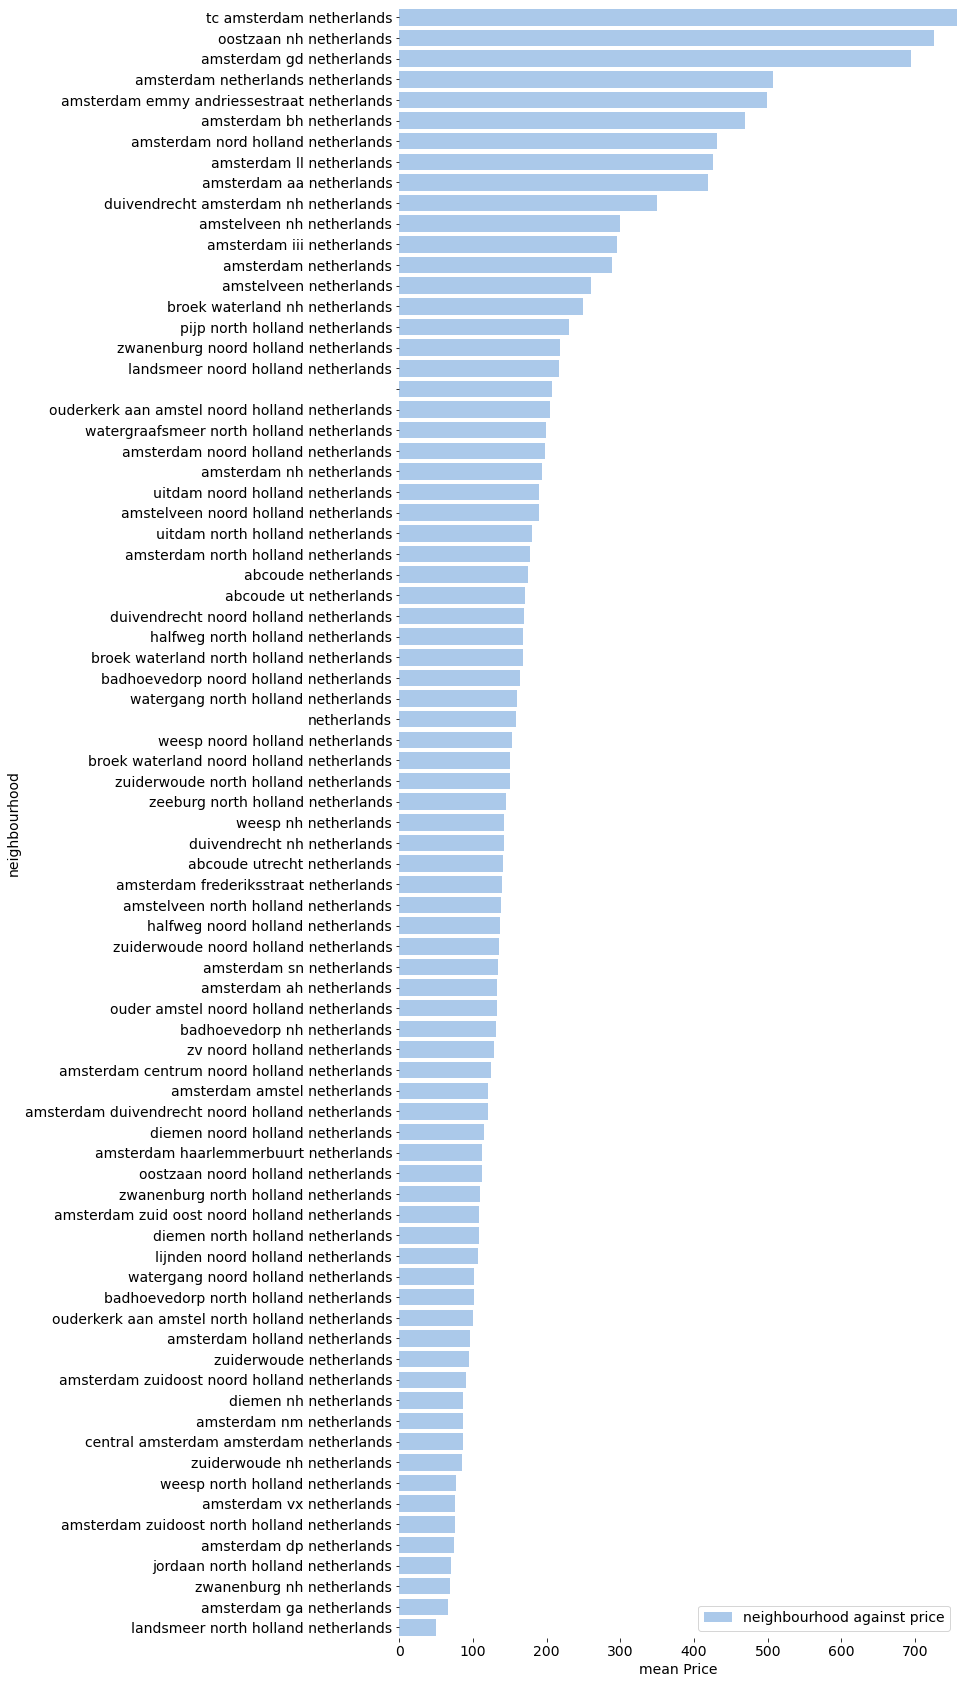

In [14]:

 
horizontal_nb(listings_df,"neighbourhood", "price")




As seen, the granularity of the neighbourhood we preproccessed is finer that the neighbourhood_cleansed below, and may lead to a better predicion.


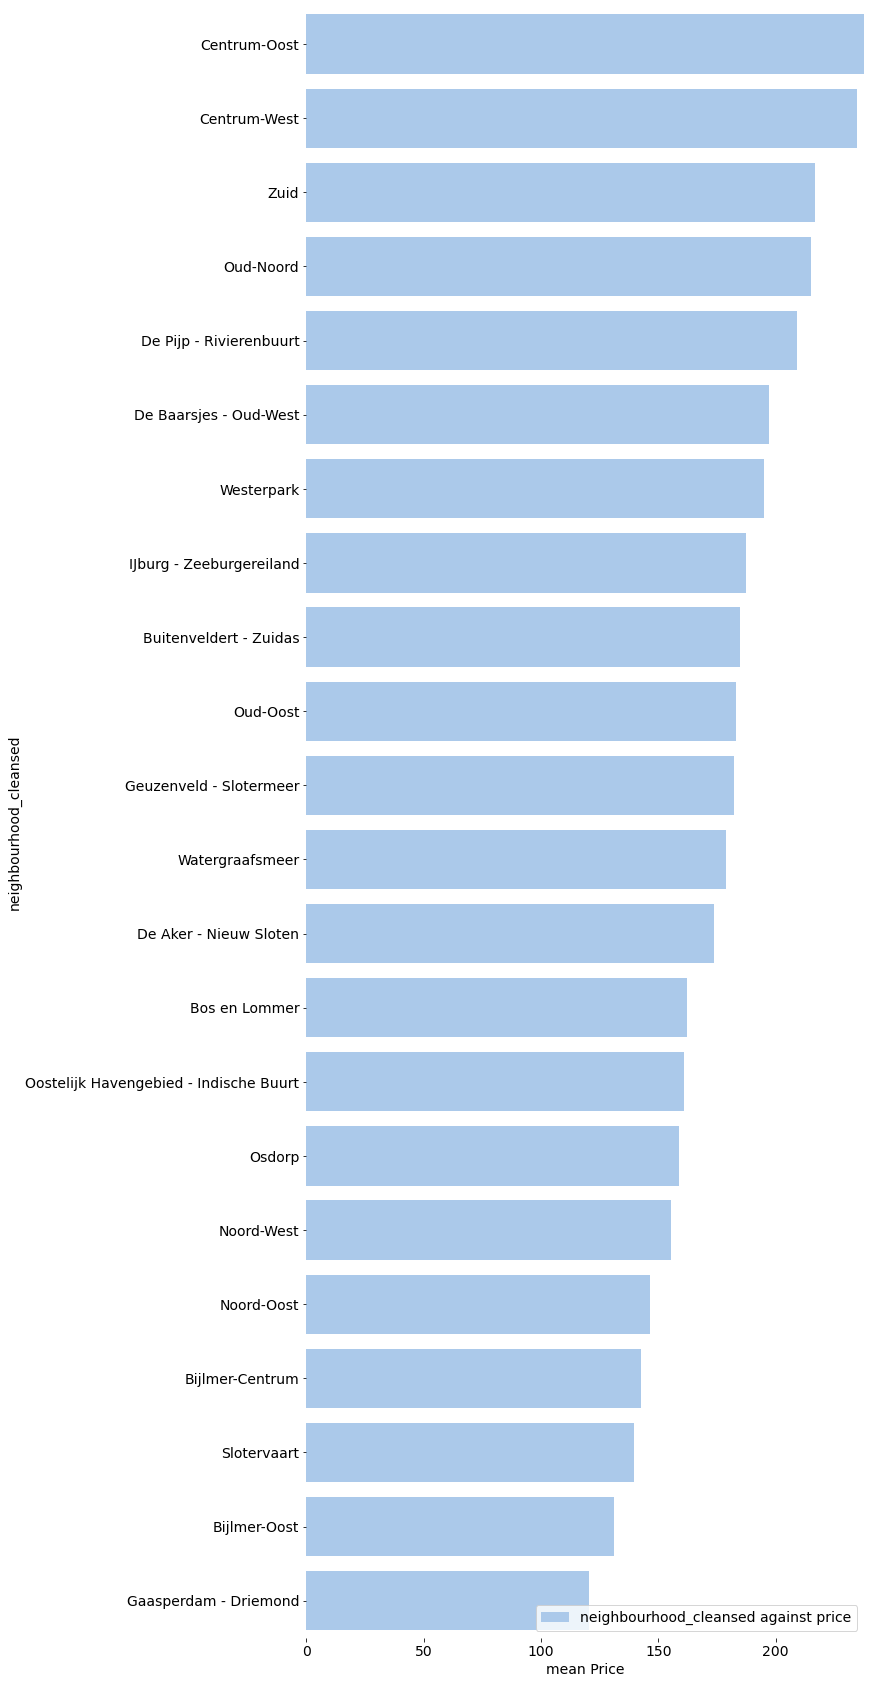

In [15]:
horizontal_nb(listings_df,"neighbourhood_cleansed", "price")


In [16]:
# we will check the correlation for features containing review, host, type and room
review_columns = select_startswith(listings_df, 'review')
listings_df_host = select_contains(listings_df, 'host')

listings_df_type = select_contains(listings_df, 'type')
listings_df_room = select_contains(listings_df, 'room')

### Types of property, rooms, and bedrooms seems like what guests might want to care about. This is likely to affact price


In [17]:
type_col = ["bedrooms", "room_type", "property_type"]

In [18]:
listings_df.room_type.value_counts()

Entire home/apt    4223
Private room       1840
Hotel room           78
Shared room          32
Name: room_type, dtype: int64

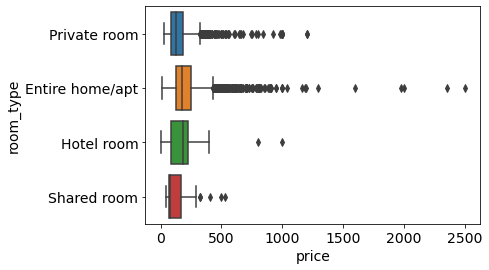

In [19]:
plot_boxplot(listings_df,"room_type", "price", (8,10))


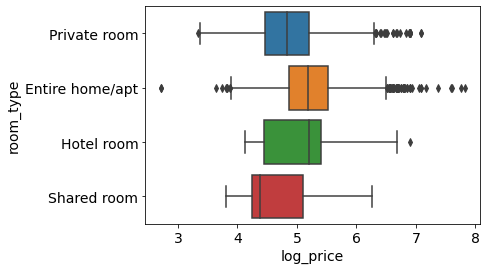

In [20]:
# boxplot requires transformation. We take the log transformation of  price 
listings_df["log_price"] = np.log(listings_df["price"])
plot_boxplot(listings_df,"room_type", "log_price", (8,10))

Useful information as expected. It is clear that the price of the entire home is more

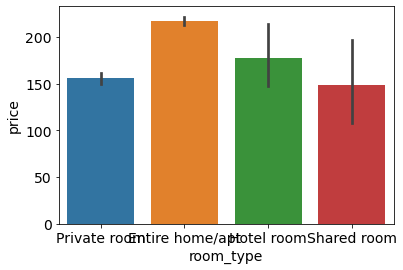

In [21]:
plot_barplot(listings_df,"room_type", "price", (8,10))

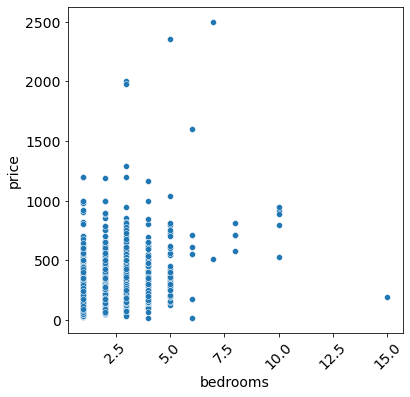

In [22]:
size = [6,6]
plot_scatterplot(listings_df,"bedrooms", "price", size[0], size[1])


Looks like price does not increase with an increase in the number of bedrooms. We keep the three features

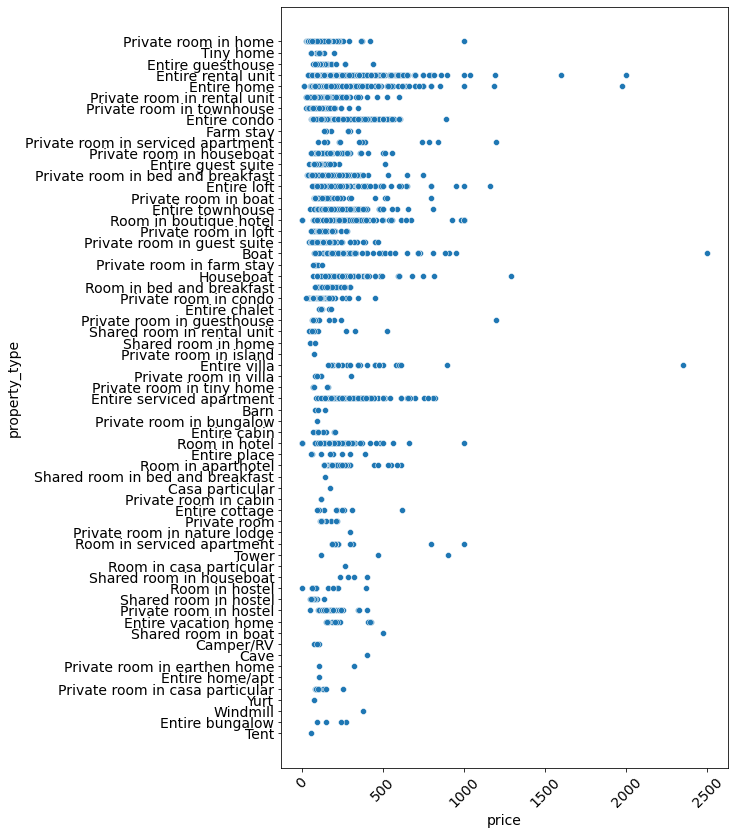

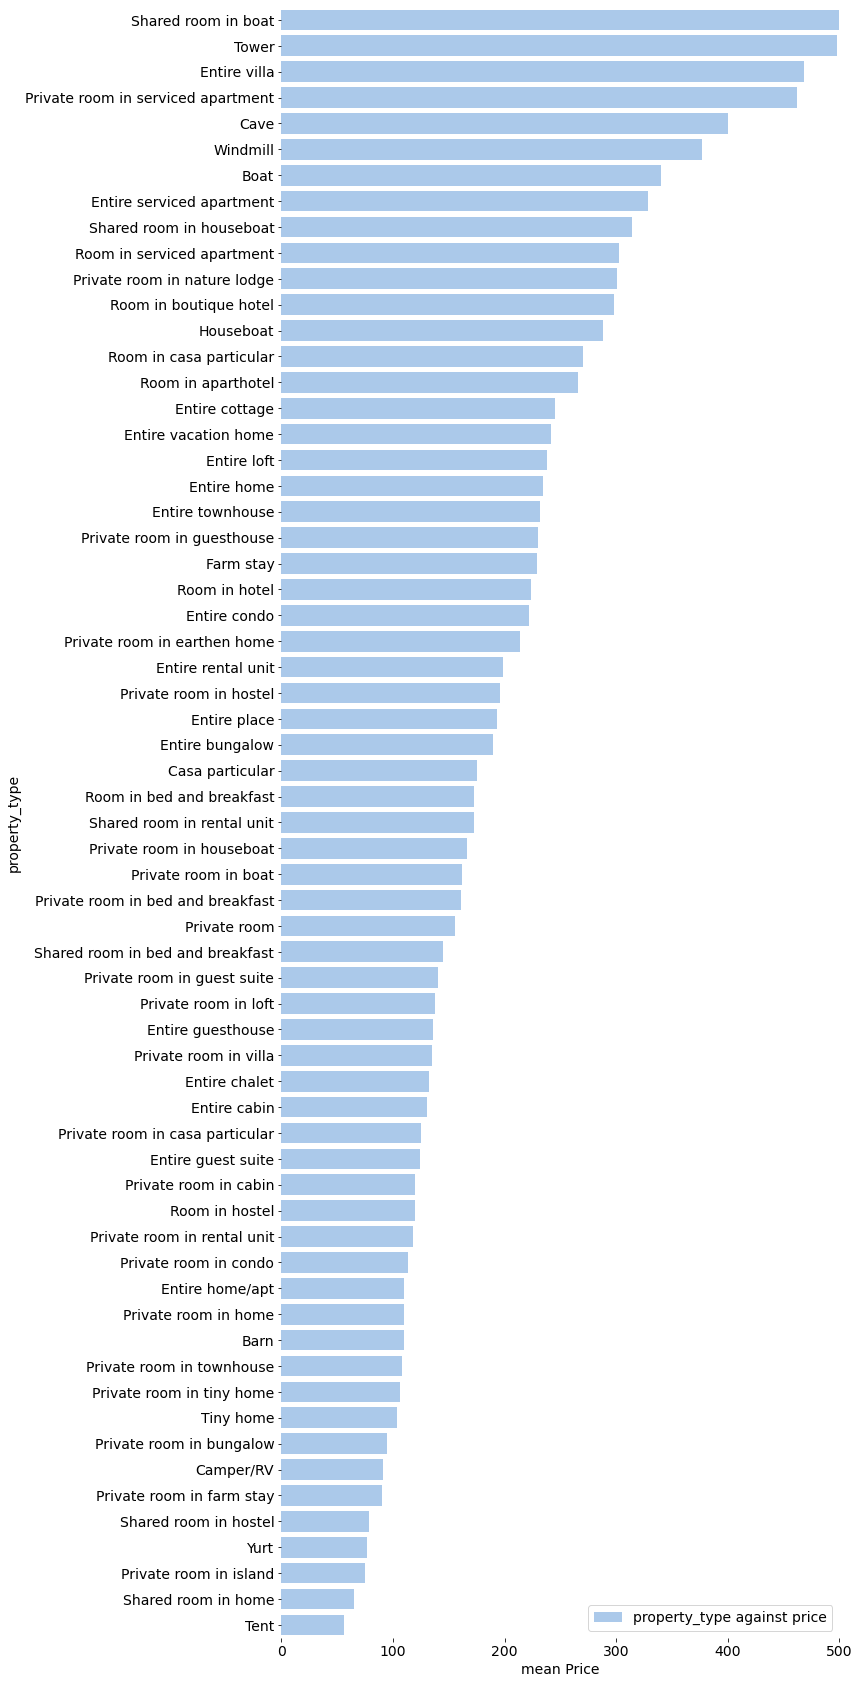

In [23]:
size = [8,14]
plot_scatterplot(listings_df,"price","property_type",size[0], size[1])
# Price does not increase with an increase in the number of bedrooms

horizontal_nb(listings_df,"property_type", "price")

## Aminities:

It likely that people would want to pay more for aminities

In [24]:
#clean amunities text
rejct_list = [".",".","*"]
listings_df["amenities"] = listings_df["amenities"].fillna("")
listings_df["amenities"] = listings_df["amenities"].apply( lambda x: preprocess(x, rejct_list))

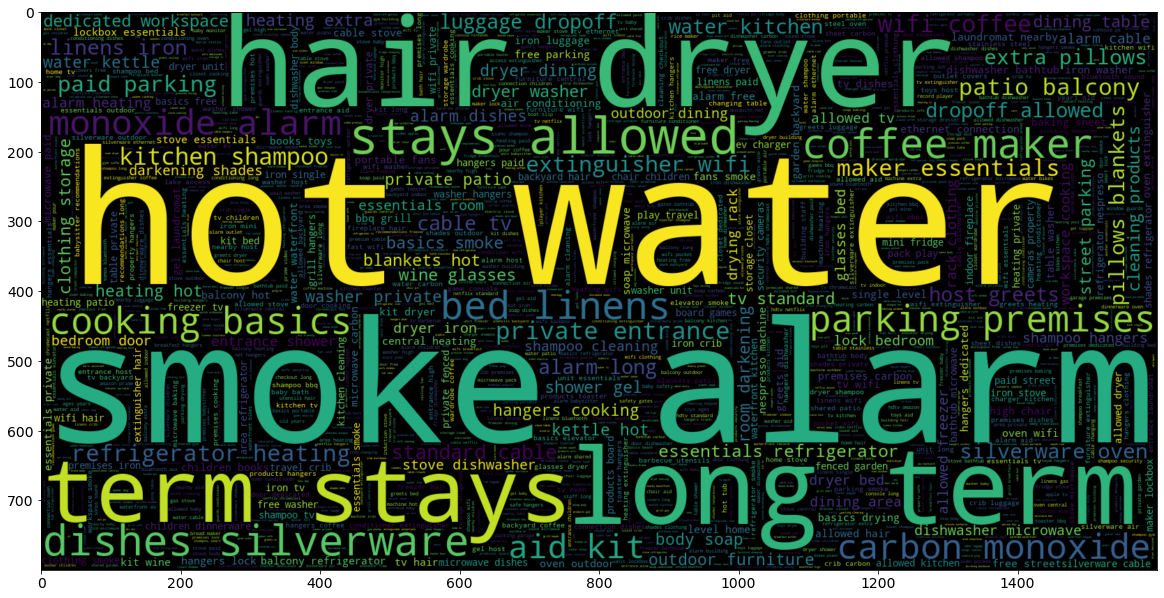

In [25]:
listings_df['amenities'] = listings_df['amenities'].apply(lambda x: " ".join(x))

# plot the word cloud for text in aminities
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(
    " ".join(listings_df.amenities))
plt.imshow(wc, interpolation = 'bilinear')
plt.savefig("aminity_popularity_in_Amstadam.png")

From the map, hot water, hair dryer, smoke alarm, long term, are the most frequent aminities advertised

We take the most occuring words in amenities and check the correlation of amenities with price where the words occure occured. We make new aminities columns based on the number of these top words that occured in the ammunity list

In [26]:
# sort ammenities based on occurance
word_list = ""
for ls in listings_df["amenities"]:
    word_list = word_list + ls
    
aminities_dic = WordCloud().process_text(word_list)

aminities_dic_sort = sorted(aminities_dic.items(), key = lambda x: x[1], reverse=True)


In [27]:
# construct amenity rank
amenity_pd = pd.DataFrame(aminities_dic_sort, columns = ["amenity","amenity_count"])
amenity_pd["amenity_rank"] = range(1,(1 + len(aminities_dic_sort)))


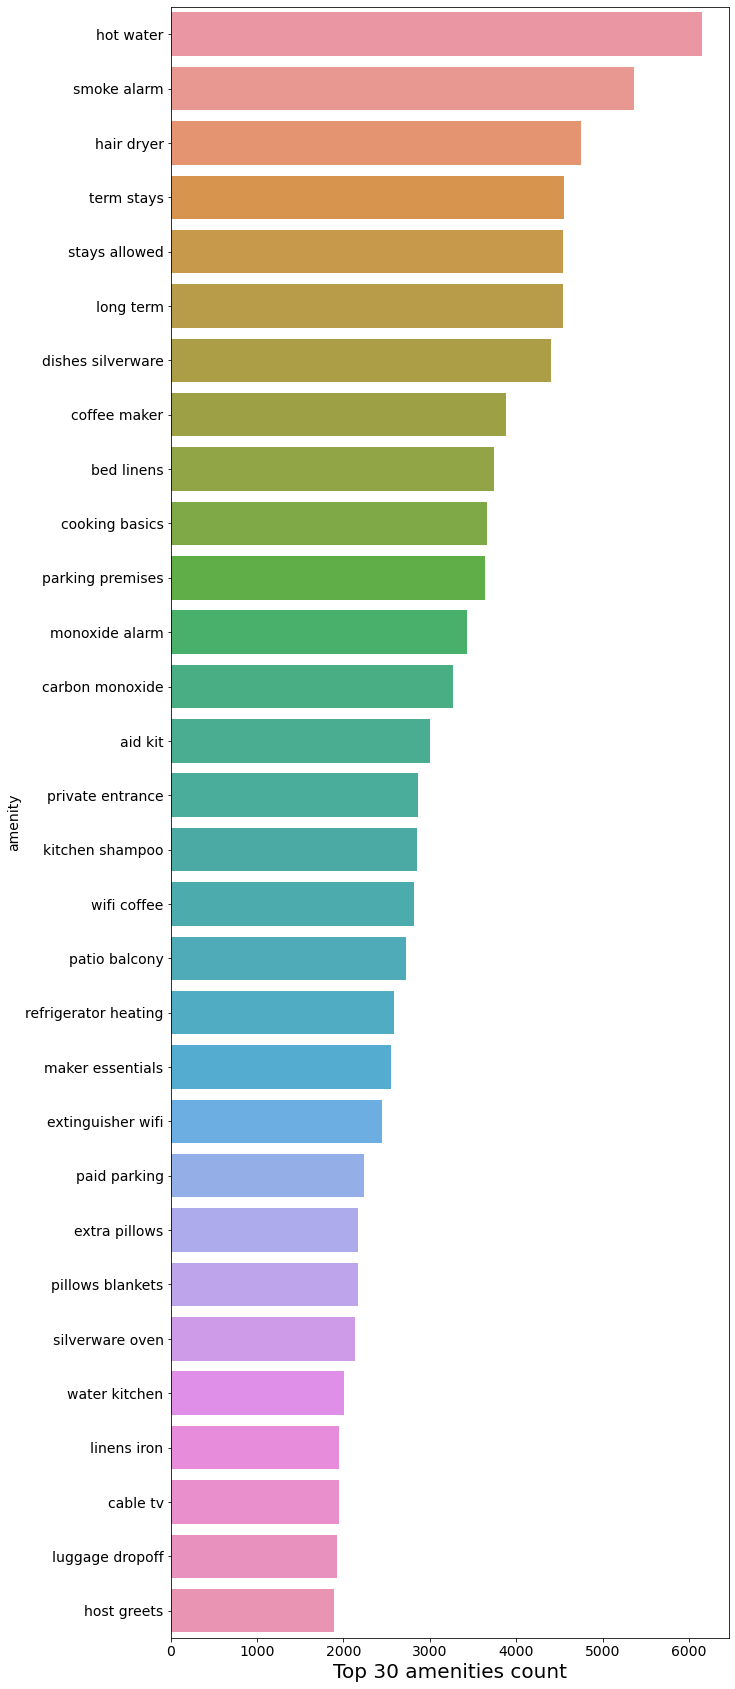

In [28]:
f, ax = plt.subplots(figsize=(10, 30))
sns.barplot(y = amenity_pd.amenity[0:30], x = amenity_pd.amenity_count[0:30], ax = ax)
plt.xlabel("Top 30 amenities count", size = 20)
plt.savefig("amenity_Popularity.png")

### Numerical Columns

In [29]:
availability_cols = listings_df.columns[listings_df.columns.str.startswith("availability")]
listings_df_avail = listings_df[availability_cols]
listings_df_avail["price"] = listings_df["price"]
listings_df_avail.corr()

,availability_30,availability_60,availability_90,availability_365,price
availability_30,1.000000,0.909736,0.850436,0.571581,0.232852
availability_60,0.909736,1.000000,0.961390,0.631980,0.235349
availability_90,0.850436,0.961390,1.000000,0.682771,0.230368
availability_365,0.571581,0.631980,0.682771,1.000000,0.183826
price,0.232852,0.235349,0.230368,0.183826,1.000000


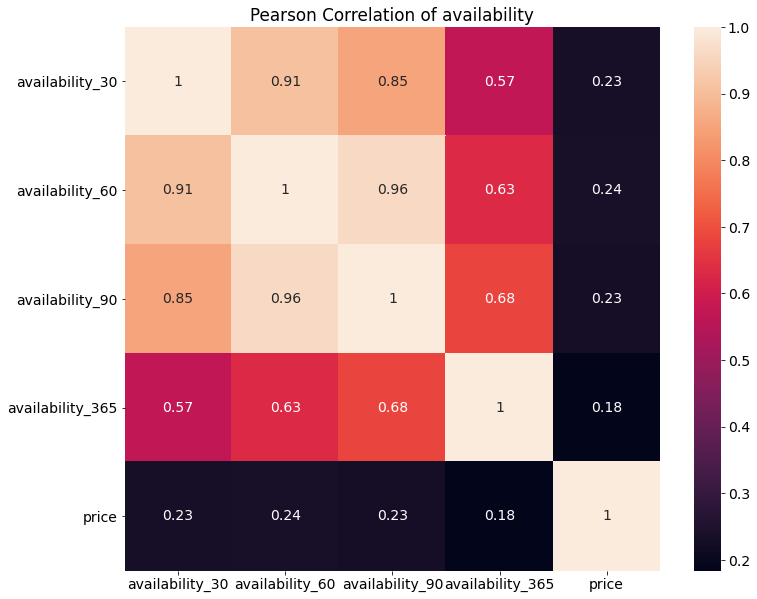

In [30]:
plot_heatmap(listings_df_avail, "availability")

In [31]:
# availability_365 have slightly lower correlation [take 365 and 60]
#listings_df.drop(["availability_90","availability_30"], axis = 1, inplace = True)


In [32]:

review_cols = listings_df.columns[listings_df.columns.str.contains("review")]
listings_df_review = listings_df[review_cols]
listings_df_review["price"] = listings_df["price"] 
listings_df_review.corr()                                  

,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price
number_of_reviews,1.000000,0.586524,0.550962,-0.028627,-0.026983,0.043588,0.007425,-0.012226,-0.007340,-0.004835,0.647624,-0.162842
number_of_reviews_ltm,0.586524,1.000000,0.843365,-0.042748,-0.055242,-0.003403,-0.030280,-0.057265,-0.035976,-0.028996,0.882624,-0.050735
number_of_reviews_l30d,0.550962,0.843365,1.000000,-0.022982,-0.035633,0.020346,-0.007481,-0.037339,-0.014267,-0.009976,0.809372,-0.076082
review_scores_rating,-0.028627,-0.042748,-0.022982,1.000000,0.787414,0.679435,0.626049,0.683362,0.415640,0.713829,-0.048579,-0.001187
review_scores_accuracy,-0.026983,-0.055242,-0.035633,0.787414,1.000000,0.591741,0.619997,0.631387,0.361306,0.656230,-0.061303,-0.039779
review_scores_cleanliness,0.043588,-0.003403,0.020346,0.679435,0.591741,1.000000,0.474474,0.433770,0.274167,0.562233,0.001090,-0.007548
review_scores_checkin,0.007425,-0.030280,-0.007481,0.626049,0.619997,0.474474,1.000000,0.699638,0.328772,0.530233,-0.030038,-0.041141
review_scores_communication,-0.012226,-0.057265,-0.037339,0.683362,0.631387,0.433770,0.699638,1.000000,0.340043,0.511352,-0.060179,-0.040566
review_scores_location,-0.007340,-0.035976,-0.014267,0.415640,0.361306,0.274167,0.328772,0.340043,1.000000,0.413902,-0.043247,0.096955
review_scores_value,-0.004835,-0.028996,-0.009976,0.713829,0.656230,0.562233,0.530233,0.511352,0.413902,1.000000,-0.025332,-0.082862


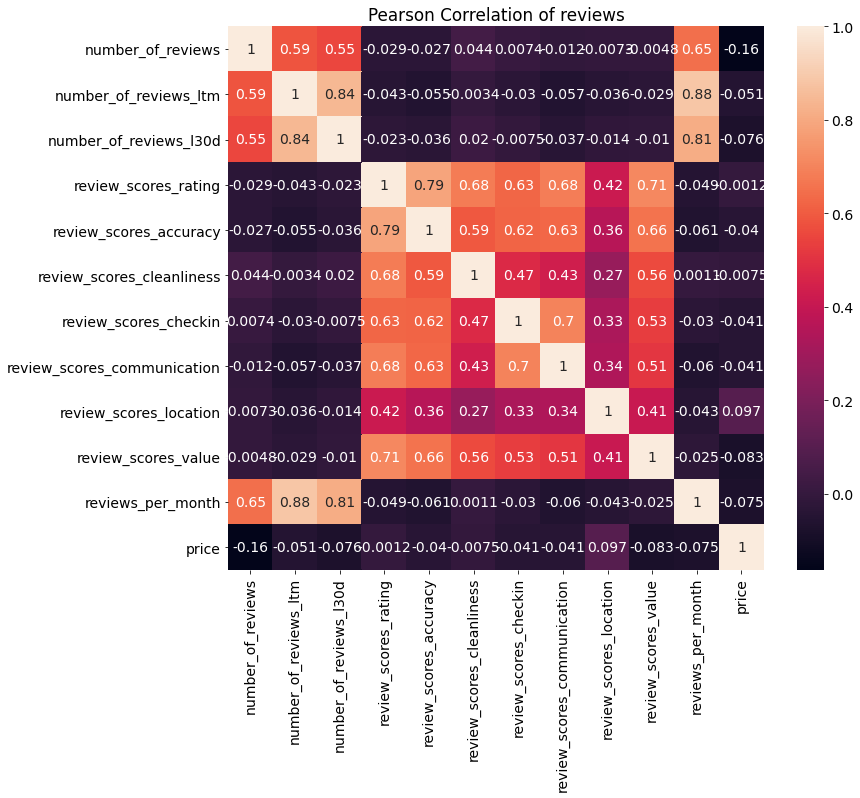

In [33]:
plot_heatmap(listings_df_review, "reviews")

From the above, reviews_per_month, number_of_reviews_ltm, and number_of_reviews_l30d are collinear . number_of_reviews have a higher correlation with price. Thus it will be includeded. I will include 

In [34]:
 listings_df.drop(["number_of_reviews_ltm","number_of_reviews_l30d", "reviews_per_month"], axis = 1, inplace = True)


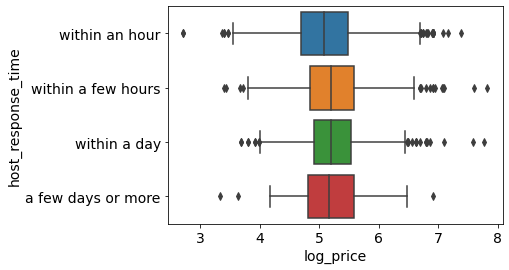

In [35]:
plt.figsize = (20,8)
plot_boxplot(listings_df,"host_response_time", "log_price", (10,14))


In [36]:
info_df = show_info(listings_df)


6173 rows, 60 attributes

Further information : 



,Unique_Values,Null_Values,Data_Type,Sample_Values
calendar_updated,1,6173,float64,NaN
bathrooms,1,6173,float64,NaN
neighbourhood_group_cleansed,1,6173,float64,NaN
host_response_time,5,1481,object,within an hour
host_response_rate,56,1481,float64,100.0
host_acceptance_rate,98,800,float64,95.0
review_scores_accuracy,107,598,float64,4.96
review_scores_location,119,598,float64,4.73
review_scores_cleanliness,139,598,float64,4.97
review_scores_checkin,107,598,float64,4.95


In [37]:
obj_info_df = info_df[info_df["Data_Type"] == "object"]
num_info_df = info_df[info_df["Data_Type"] != "object"]


In [38]:
obj_info_df = obj_info_df[obj_info_df["Unique_Values"] < 300]


In [39]:
obj_info_df



,Unique_Values,Null_Values,Data_Type,Sample_Values
host_response_time,5,1481,object,within an hour
bathrooms_text,24,15,object,1 shared bath
calendar_last_scraped,1,0,object,2022-06-05
instant_bookable,2,0,object,t
has_availability,2,0,object,t
last_scraped,1,0,object,2022-06-05
host_is_superhost,2,0,object,f
host_verifications,6,0,object,"['email', 'phone', 'work_email']"
host_has_profile_pic,2,0,object,t
host_identity_verified,2,0,object,t


In [40]:
#drop columns not used

num_drop_list2 = ["calendar_updated", "bathrooms", "neighbourhood_group_cleansed", 
              "scrape_id", "scrape_id", "id", "latitude","longitude", "log_price"]

cat_drop_list = ['calendar_last_scraped','last_scraped','bathrooms_text', "host_verifications"]


num_info_df.drop(num_drop_list2, axis = 0, inplace = True)


obj_info_df.drop(cat_drop_list, axis = 0, inplace = True)


In [41]:
# Feature scalling
for co in listings_df[obj_info_df.index]:
    listings_df[co] = listings_df[co].astype("category")

## Machine Learning    

In [42]:
# Preprocessing  Numerical and Categorical features

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,  OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


# Numerical features
numerical_feature = ['host_response_rate', 'host_acceptance_rate', 'review_scores_value',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_accuracy', 'review_scores_rating', 'bedrooms', 'beds',
       'minimum_minimum_nights', 'maximum_nights_avg_ntm',
       'minimum_nights_avg_ntm', 'maximum_maximum_nights',
       'minimum_maximum_nights', 'maximum_minimum_nights', 'availability_365',
       'availability_60', 'calculated_host_listings_count_shared_rooms',
       'number_of_reviews', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'host_days_of_experience',
       'calculated_host_listings_count_private_rooms', 'host_listings_count',
       'host_total_listings_count', 'maximum_nights', 'accommodates','minimum_nights']

# Pipeline for numerical features
numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), 
        ('std_scaler', StandardScaler()),
    ])


# Categorical features
categorical_feature = ['host_response_time', 'has_availability', 'instant_bookable',
       'host_is_superhost', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'property_type',
       'room_type']


Y = listings_df["price"]
X = listings_df[categorical_feature + numerical_feature].copy()


# categorical  feature
categorical_pipeline = Pipeline([
                            ('imputer', SimpleImputer(strategy = 'most_frequent')),
                            ('ord_encoder', OrdinalEncoder(handle_unknown = "ignore")),
                            ])


########## Combined Pipeline for all features ############
pre_pipe = ColumnTransformer([
        ("categorical", categorical_pipeline, categorical_feature),
        ("numerical", numerical_pipeline, numerical_feature),
   ])


# Fit Preprocessing pipeline
#listing_final_df = pre_pipe.fit_transform(listings_df[categorical_feature + numerical_feature])

# 80 for training and 20 for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y,train_size = 0.80, random_state = 20 )



### Model Bulding 

In [43]:
# import models
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.tree import DecisionTreeRegressor



ln_model_pip = Pipeline(steps =
                [
                    ("transform", pre_pipe),
                    ("LinearRegression", LinearRegression())
                ])
dt_model_pip = Pipeline(steps =
                [
                    ("transform", pre_pipe),
                    ("DecissionTreeRegressor", DecisionTreeRegressor(max_depth = 10))
                ])

GBR_model_pip = Pipeline(steps =
                [
                    ("transform", pre_pipe),
                    ("Gradient", GradientBoostingRegressor())
                ])

RandomForest_model_pip = Pipeline(steps =
                [
                    ("transform", pre_pipe),
                    ("RandomForestRegressor", RandomForestRegressor(n_estimators=100, max_depth=10, random_state=10))
                ])


pipelines = [ln_model_pip, dt_model_pip, GBR_model_pip, RandomForest_model_pip]


In [44]:
best_accuracy = 0
best_classifier = " "
best_pipline = " "

    
pipeline_dict = {0: "LinearRegression", 1: "DecissionTreeRegressor", 2: "GBR_model_pip", 3: "RandomForestRegressor"}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [45]:
# import metrics 
from sklearn.metrics import r2_score
from sklearn import set_config
    
    
# Evaluate the model   
for i, model in enumerate(pipelines):
    print("\n {} model has an accracy of {:.2f} and r2_score of {:.2f}."
          .format(pipeline_dict[i], model.score(X_test, y_test)*100, r2_score(y_test, model.predict(X_test))*100))


 LinearRegression model has an accracy of 32.53 and r2_score of 32.53.

 DecissionTreeRegressor model has an accracy of -9.13 and r2_score of -9.13.

 GBR_model_pip model has an accracy of 46.09 and r2_score of 46.09.

 RandomForestRegressor model has an accracy of 42.76 and r2_score of 42.76.


In [46]:
#
from sklearn.model_selection import learning_curve



train_sizes, train_scores, valid_scores, fit_times, score_times = learning_curve(GBR_model_pip , X_train, y_train,
                                                                                 train_sizes=[0.25, 0.50, 0.75, 1], cv=10,
                                                                                 scoring="neg_mean_squared_error", 
                                                                                 return_times=True)

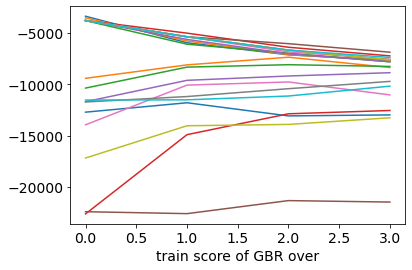

In [50]:
# plot performance graph
plt.plot(train_scores)
plt.xlabel("train score of GBR over", fontsize = 14)
plt.plot(valid_scores)
plt.savefig("train_score of GBR.png")

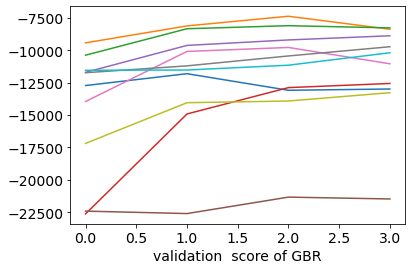

In [51]:
plt.plot(valid_scores)
plt.xlabel("validation  score of GBR", fontsize = 14)
plt.savefig("valid_scores of GBR.png")